In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
# ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [76]:
df_dir_1 = pd.read_csv(
    '/Users/rebeccadillon/git/dublin-bus-team-5/machinelearning/data/cleaned/data_exploration_dir_1_cleaned.csv')
df_dir_2 = pd.read_csv(
    '/Users/rebeccadillon/git/dublin-bus-team-5/machinelearning/data/cleaned/data_exploration_dir_2_cleaned.csv')


Drop trip ID and direction from dataframes

In [77]:
df_dir_1 = df_dir_1.drop(columns=['DIRECTION', 'TRIPID', 'ROUTEID'], axis=1)
df_dir_2 = df_dir_2.drop(columns=['DIRECTION', 'TRIPID', 'ROUTEID'], axis=1)


In [78]:
lines_dir_1 = sorted(list(df_dir_1['LINEID'].unique()))
lines_dir_1


['1',
 '102',
 '104',
 '11',
 '111',
 '114',
 '116',
 '120',
 '122',
 '123',
 '13',
 '130',
 '14',
 '140',
 '142',
 '145',
 '14C',
 '15',
 '150',
 '151',
 '15A',
 '15B',
 '15D',
 '16',
 '161',
 '16C',
 '16D',
 '17',
 '17A',
 '18',
 '184',
 '185',
 '220',
 '236',
 '238',
 '239',
 '25',
 '25A',
 '25B',
 '25D',
 '25X',
 '26',
 '27',
 '270',
 '27A',
 '27B',
 '27X',
 '29A',
 '31',
 '31A',
 '31B',
 '31D',
 '32',
 '32X',
 '33',
 '33A',
 '33B',
 '33D',
 '33E',
 '33X',
 '37',
 '38',
 '38A',
 '38B',
 '38D',
 '39',
 '39A',
 '39X',
 '4',
 '40',
 '40B',
 '40D',
 '40E',
 '41',
 '41B',
 '41C',
 '41D',
 '41X',
 '42',
 '42D',
 '43',
 '44',
 '44B',
 '45A',
 '46A',
 '47',
 '49',
 '51D',
 '53',
 '54A',
 '56A',
 '59',
 '61',
 '63',
 '65',
 '65B',
 '66',
 '66A',
 '66B',
 '66X',
 '67',
 '67X',
 '68',
 '68A',
 '69',
 '69X',
 '7',
 '70',
 '70D',
 '75',
 '76',
 '76A',
 '77A',
 '79',
 '79A',
 '7A',
 '7B',
 '7D',
 '83',
 '83A',
 '84',
 '84A',
 '84X',
 '9']

To determine if there are any pairwise interactions, I will complete the following code for a number of lines individually. This is because of the large variation in mean trip length, shown in feature_pairwise_interactions. To begin with, I will find the lines with the most rows. This will allow better representation of the effect of different features on the target variable.

In [79]:
max_rows = 0
for line in lines_dir_1:
    number_rows = df_dir_1[df_dir_1['LINEID'] == line].shape[0]
    if number_rows > max_rows:
        max_rows = number_rows
        max_line = line
        print(max_rows, line)


15972 1
16766 122
21513 123
22215 130
27344 145
35015 46A


The 5 lines with the most rows are shown above.
We will begin with the 46A.

In [80]:
highest_n_rows = ['46A', '145', '130', '123', '122']


Performing test_train_split

In [81]:
for line in highest_n_rows:
    print("Now doing line", str(line))
    df_temp = df_dir_1[df_dir_1['LINEID'] == line]
    df_temp.set_index(np.random.permutation(df_temp.index))
    df_temp.sort_index(inplace=True)
    df_temp.drop(columns=['LINEID'], inplace=True)

    X = df_temp.drop(columns=["TRIPTIME"], axis=1)
    y = pd.DataFrame(df_temp['TRIPTIME'])

    # do test train split
    # Split the dataset into two datasets: 70% training and 30% test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=1)
    # Select columns containing categorical data
    categorical_cols = X_train.select_dtypes('object').columns
    categorical_cols = categorical_cols.append(
        X_train[['WEEKDAY', 'HOUR', 'MONTH', 'RUSHHOUR', 'weather_id', 'weather_main', 'weather_description', 'snow_ice', 'heavy_precip']].columns)

    # Convert data type to category for these columns
    for col in categorical_cols:
        X_train[col] = X_train[col].astype('category')
    continuous_cols = X_train.select_dtypes(['float64', 'int64']).columns

    # dict to hold correlation values
    corr_dict = {}

    # plot pairwise interaction between all continuous features and target
    for column in X_train[continuous_cols]:
        # create temp df to merge column and target
        df_temp = pd.concat([X_train[column], y_train], axis=1)
        # store correlation in variable
        correlation = df_temp[[column, "TRIPTIME"]].corr().values[0, 1]
        # add correlation to dict
        corr_dict[column] = correlation

        # dataframe holding sorted correlation values to aid in interpreting results
        corr_df = pd.DataFrame.from_dict(corr_dict, orient='index', columns=[
                                         'TRIPTIME']).sort_values('TRIPTIME', ascending=False)

    print("Relationship between continuous features with triptime:")
    print(corr_df)


Now doing line 46A
Relationship between continuous features with triptime:
                 TRIPTIME
wind_speed       0.113816
temp_min         0.060644
temp             0.058896
temp_max         0.053144
feels_like       0.046949
rain_1h          0.042500
clouds_all       0.026430
wind_deg         0.016960
dew_point       -0.024998
pressure        -0.032666
snow_1h         -0.038040
humidity        -0.154649
PLANNEDTIME_ARR -0.196887
PLANNEDTIME_DEP -0.226256
Now doing line 145
Relationship between continuous features with triptime:
                 TRIPTIME
temp             0.109314
temp_min         0.109230
temp_max         0.106710
feels_like       0.098956
wind_speed       0.068455
clouds_all       0.029714
rain_1h          0.027249
dew_point        0.022323
PLANNEDTIME_ARR  0.008987
wind_deg        -0.004811
pressure        -0.012773
PLANNEDTIME_DEP -0.023346
snow_1h         -0.033315
humidity        -0.166242
Now doing line 130
Relationship between continuous features with tript

Print correlation matrix on heatmap for line 46A

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0.5, 0, 'PLANNEDTIME_ARR'),
  Text(1.5, 0, 'PLANNEDTIME_DEP'),
  Text(2.5, 0, 'temp'),
  Text(3.5, 0, 'dew_point'),
  Text(4.5, 0, 'feels_like'),
  Text(5.5, 0, 'temp_min'),
  Text(6.5, 0, 'temp_max'),
  Text(7.5, 0, 'pressure'),
  Text(8.5, 0, 'humidity'),
  Text(9.5, 0, 'wind_speed'),
  Text(10.5, 0, 'wind_deg'),
  Text(11.5, 0, 'rain_1h'),
  Text(12.5, 0, 'snow_1h'),
  Text(13.5, 0, 'clouds_all')])

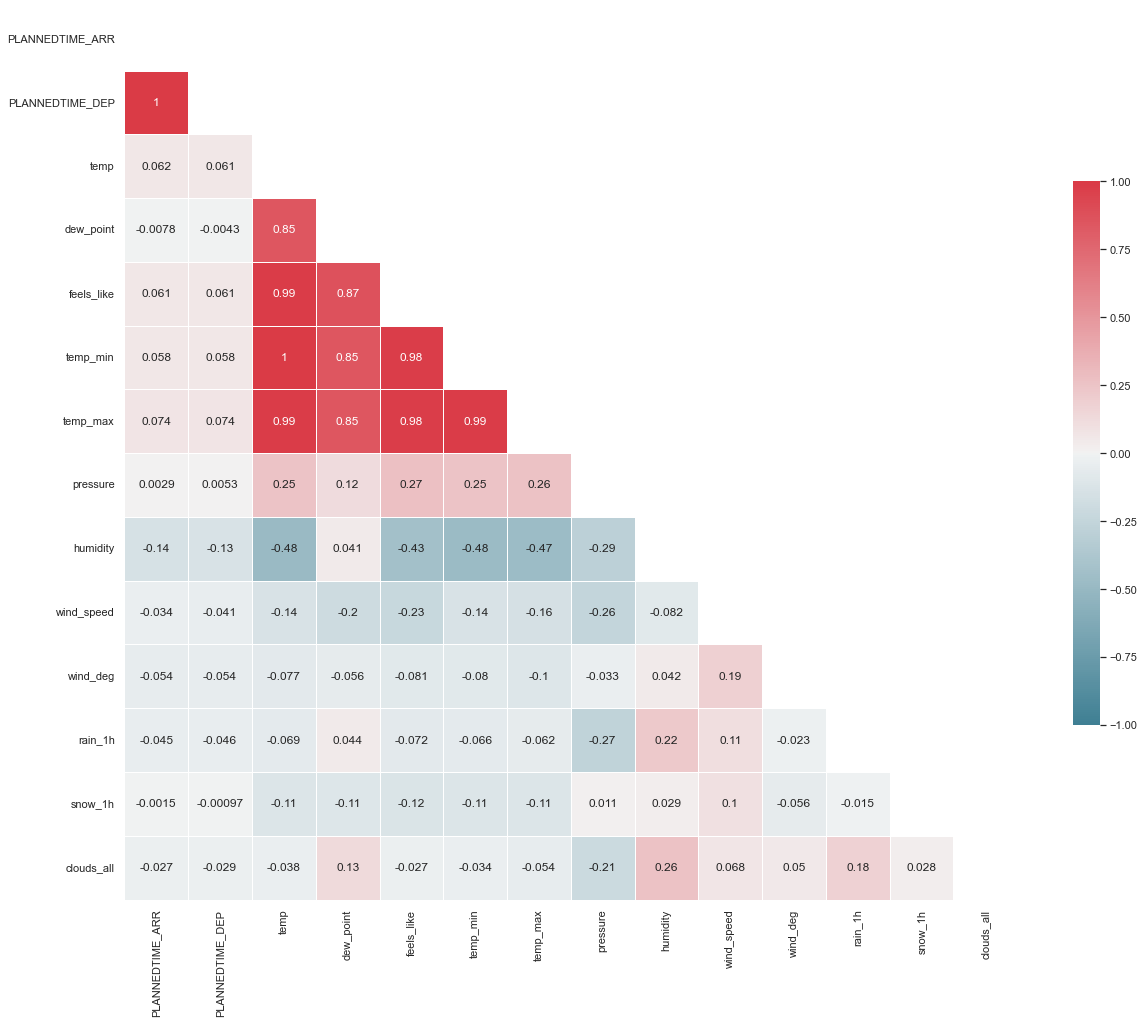

In [82]:
df_temp = df_dir_1[df_dir_1['LINEID'] == '46A']
df_temp.set_index(np.random.permutation(df_temp.index))
df_temp.sort_index(inplace=True)
df_temp.drop(columns=['LINEID'], inplace=True)

X = df_temp.drop(columns=["TRIPTIME"], axis=1)
y = pd.DataFrame(df_temp['TRIPTIME'])

    # do test train split
    # Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=1)
    # Select columns containing categorical data
categorical_cols = X_train.select_dtypes('object').columns
categorical_cols = categorical_cols.append(
X_train[['WEEKDAY', 'HOUR', 'MONTH', 'RUSHHOUR', 'weather_id', 'weather_main', 'weather_description', 'snow_ice', 'heavy_precip']].columns)

    # Convert data type to category for these columns
for col in categorical_cols:
        X_train[col] = X_train[col].astype('category')
continuous_cols = X_train.select_dtypes(['float64', 'int64']).columns

# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Calculate correlation of all pairs of continuous features
corr = X_train[continuous_cols].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=90)

Although their are variations for the correlation of each feature as we were looking at a number of lines, I have grouped them into the following brackets based upon the best correlation value shown.

<b>Correlations</b>

| Low correlation | Medium correlation | High correlation |
|-----------------|--------------------|------------------|
| x <= 0.1       | 0.1 < x < 0.3    | x >= 0.3       |
| feels_like, rain_1h, wind_deg, clouds_all, snow_1h, dew_point, pressure | temp_min, temp, temp_max, wind_speed, humidity | plannedtime_dep, plannedtime_arr|

The most informative features are shown as 'temp_min','temp_max','temp','wind_speed','humidity','plannedtime_dep' and 'plannedtime_arr'. The correlations between continuous features show strong correlations between features 'temp','temp_min' and 'temp_max'. For simplicity, I will keep just 'temp'. There is also a strong correlation between features 'plannedtime_arr' and 'plannedtime_dep'. As 'plannedtime_dep' consistently shows a higher correlation with the target feature, I will drop 'plannedtime_arr'.

I will drop the other features from the dataframe as they are unlikely to contribute to the model.

In [59]:
features_to_drop = ['PLANNEDTIME_ARR', 'feels_like', 'rain_1h', 'wind_deg',
                    'clouds_all', 'snow_1h', 'dew_point', 'pressure', 'temp_min', 'temp_max']
high_correlation_features = [
    'temp', 'wind_speed', 'humidity', 'PLANNEDTIME_DEP']


In [60]:
df_dir_1 = df_dir_1.drop(columns=features_to_drop, axis=1)
df_dir_1


,LINEID,PLANNEDTIME_DEP,HOUR,temp,humidity,wind_speed,weather_id,weather_main,weather_description,snow_ice,heavy_precip,TRIPTIME,WEEKDAY,MONTH,RUSHHOUR
0,25,84000.0,23,6.39,87,7.2,300,Drizzle,light intensity drizzle,0,0,1896.0,2,2,0
1,65B,84600.0,23,6.39,87,7.2,300,Drizzle,light intensity drizzle,0,0,2759.0,2,2,0
2,83,82800.0,23,6.39,87,7.2,300,Drizzle,light intensity drizzle,0,0,3360.0,2,2,0
3,66B,82800.0,23,6.39,87,7.2,300,Drizzle,light intensity drizzle,0,0,2354.0,2,2,0
4,15,82800.0,23,6.39,87,7.2,300,Drizzle,light intensity drizzle,0,0,3873.0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937713,65,20400.0,5,1.39,93,2.1,801,Clouds,few clouds,0,0,3632.0,5,5,0
937714,27,19800.0,5,1.39,93,2.1,801,Clouds,few clouds,0,0,3884.0,5,5,0
937715,77A,21300.0,5,1.39,93,2.1,801,Clouds,few clouds,0,0,3102.0,5,5,0
937716,65B,21000.0,5,1.39,93,2.1,801,Clouds,few clouds,0,0,2359.0,5,5,0


Create stacked bar plots for all categorical features

In [62]:
# barplot function
def bar_plot(col1, col2, df):
    df.groupby(col1)[col2].mean().plot.bar(cmap='Pastel2')
    plt.title(col1 + " vs " + col2)
    plt.xticks(rotation=45)
    plt.tight_layout()

# boxplot
def boxplot_time(col1, X_train, y_train):
    sns.boxplot(x=X_train[col1], y=y_train['TRIPTIME'], palette='pastel')
    plt.title(col1 + " vs Trip Time")
    plt.xticks(rotation=45)
    plt.tight_layout()


Plotting categorical pairwise interactions for only the line with the highest number of rows (46A)

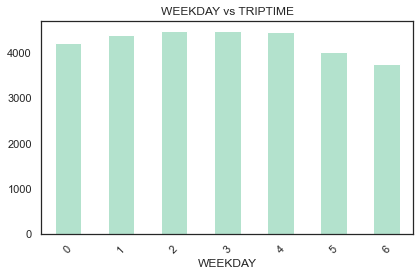

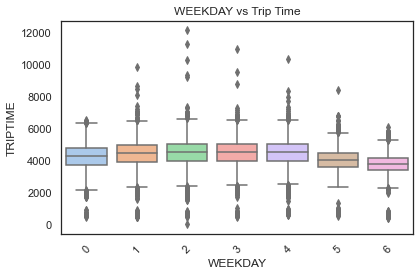

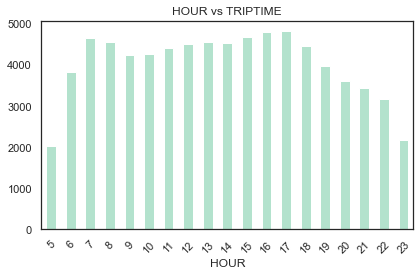

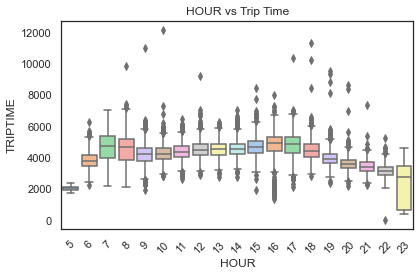

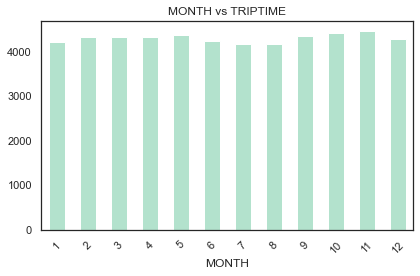

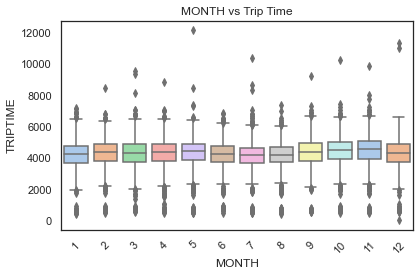

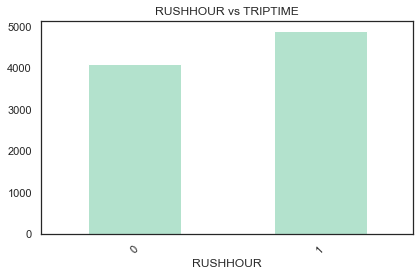

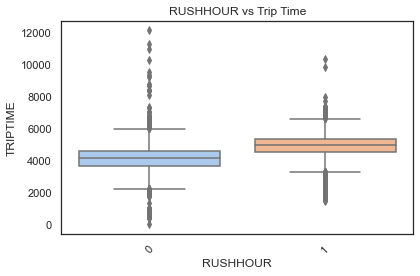

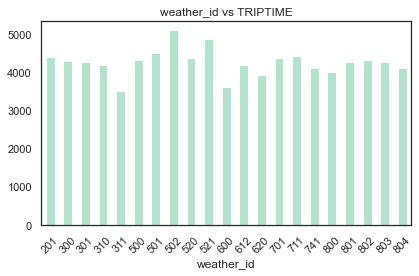

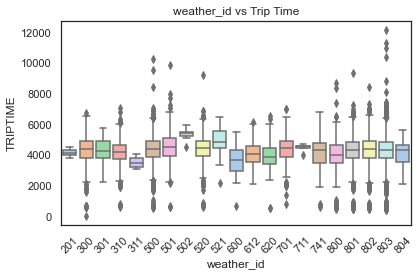

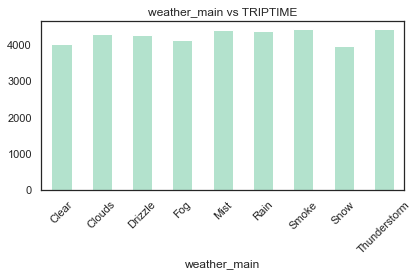

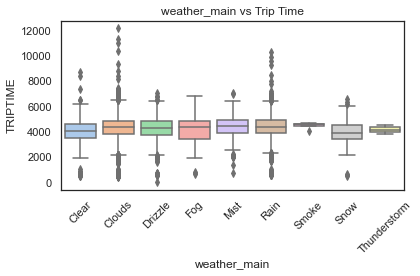

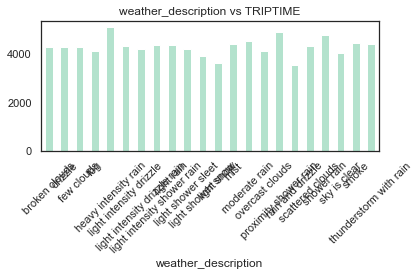

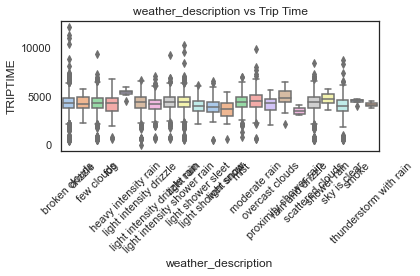

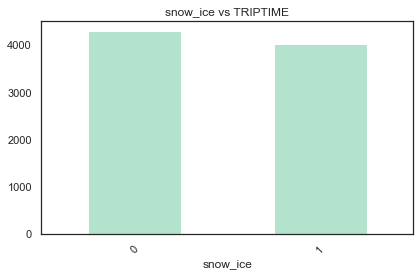

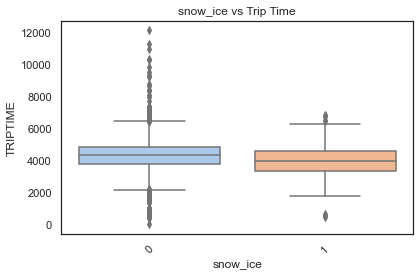

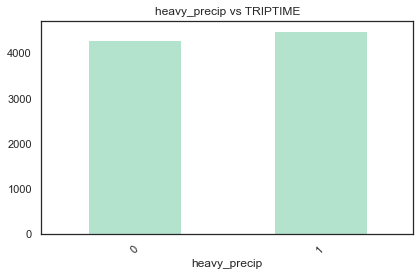

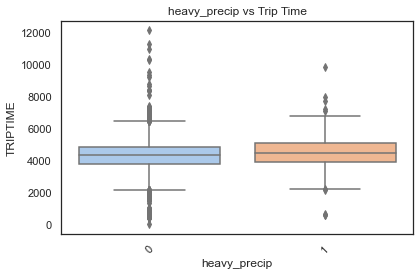

In [64]:
df_temp = df_dir_1[df_dir_1['LINEID'] == '46A']
df_temp.set_index(np.random.permutation(df_temp.index))
df_temp.sort_index(inplace=True)
df_temp.drop(columns=['LINEID'], inplace=True)

X = df_temp.drop(columns=["TRIPTIME"], axis=1)
y = pd.DataFrame(df_temp['TRIPTIME'])

# do test train split
# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)
# Select columns containing categorical data
categorical_cols = X_train[['WEEKDAY', 'HOUR', 'MONTH', 'RUSHHOUR', 'weather_id',
                            'weather_main', 'weather_description', 'snow_ice', 'heavy_precip']].columns

# Convert data type to category for these columns
for col in categorical_cols:
    X_train[col] = X_train[col].astype('category')
continuous_cols = X_train.select_dtypes(['float64', 'int64']).columns

for col in categorical_cols:
    bar_plot(col, 'TRIPTIME', df_temp)
    plt.show()
    boxplot_time(col, X_train, y_train)
    plt.show()


| Feature             | Interaction with Triptime                                                                                           | Action |
|---------------------|---------------------------------------------------------------------------------------------------------------------|--------|
| Weekday             | Monday and weekend values showing lower means                                                                       | Keep   |
| Hour                | 7pm to 5am showing low mean values, rush hours evident                                                              | Keep   |
| Month               | Not a lot of variation across Month, however, may be clearer when interaction with hour is also considered          | Keep   |
| Rush hour           | Non-rush hour values showing lower mean trip time and more variability                                              | Keep   |
| Weather ID          | Lots of variation across categories                                                                                 | Keep   |
| Weather Main        | Less variation across categories when compared to weather ID and description features                               | Drop   |
| Weather Description | Lots of variation across categories, however, will be dropped due to it holding the same information was weather ID | Drop   |
| Snow Ice            | Low information gain                                                                                                | Drop   |
| Heavy Precip        | Low information gain                                                                                                | Drop   |

I will split the features into low, medium and high information gain categories based on the above plots and analysis of plots.

In [65]:
categorical_high_info_gain = ['HOUR', 'WEEKDAY', "RUSHHOUR"]
categorical_med_info_gain = ['MONTH', 'weather_id']
categorical_low_info_gain = ['weather_main', 'snow_ice', 'weather_description','heavy_precip']

In [66]:
df_dir_1 = df_dir_1.drop(columns=categorical_low_info_gain, axis=1)


In [67]:
df_dir_1.to_csv(
    '/Users/rebeccadillon/git/dublin-bus-team-5/machinelearning/data/cleaned/feature_pairwise_cleaned_dir1.csv', index=False)


## Direction 2
Repeat the same steps for direction 2

In [68]:
lines_dir_2 = sorted(list(df_dir_2['LINEID'].unique()))
lines_dir_2


['1',
 '102',
 '104',
 '11',
 '111',
 '114',
 '116',
 '118',
 '120',
 '122',
 '123',
 '13',
 '130',
 '14',
 '140',
 '142',
 '145',
 '14C',
 '15',
 '150',
 '151',
 '15A',
 '15B',
 '15D',
 '16',
 '161',
 '16C',
 '17',
 '17A',
 '18',
 '184',
 '185',
 '220',
 '236',
 '238',
 '239',
 '25',
 '25A',
 '25B',
 '25D',
 '25X',
 '26',
 '27',
 '270',
 '27A',
 '27B',
 '27X',
 '29A',
 '31',
 '31A',
 '31B',
 '31D',
 '32',
 '32X',
 '33',
 '33A',
 '33B',
 '33D',
 '33X',
 '37',
 '38',
 '38A',
 '38B',
 '38D',
 '39',
 '39A',
 '39X',
 '4',
 '40',
 '40B',
 '40D',
 '40E',
 '41',
 '41A',
 '41B',
 '41C',
 '41D',
 '41X',
 '42',
 '42D',
 '43',
 '44',
 '44B',
 '45A',
 '46A',
 '46E',
 '47',
 '49',
 '51D',
 '51X',
 '53',
 '54A',
 '56A',
 '59',
 '61',
 '63',
 '65',
 '65B',
 '66',
 '66A',
 '66B',
 '66X',
 '67',
 '67X',
 '68',
 '68A',
 '68X',
 '69',
 '69X',
 '7',
 '70',
 '70D',
 '75',
 '76',
 '76A',
 '77A',
 '77X',
 '79',
 '79A',
 '7A',
 '7B',
 '7D',
 '83',
 '83A',
 '84',
 '84A',
 '84X',
 '9']

In [69]:
max_rows = 0
for line in lines_dir_2:
    number_rows = df_dir_2[df_dir_2['LINEID'] == line].shape[0]
    if number_rows > max_rows:
        max_rows = number_rows
        max_line = line
        print(max_rows, line)


16339 1
16525 122
21257 123
22960 130
26417 145
33043 46A


The 5 lines with the most rows are shown above.
We will begin with the 46A.

In [70]:
highest_n_rows = ['46A', '145', '130', '123', '122']


Performing test_train_split

In [72]:
for line in highest_n_rows:
    print("Now doing line", str(line))
    df_temp = df_dir_2[df_dir_2['LINEID'] == line]
    df_temp.set_index(np.random.permutation(df_temp.index))
    df_temp.sort_index(inplace=True)
    df_temp.drop(columns=['LINEID'], inplace=True)

    X = df_temp.drop(columns=["TRIPTIME"], axis=1)
    y = pd.DataFrame(df_temp['TRIPTIME'])

    # do test train split
    # Split the dataset into two datasets: 70% training and 30% test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=1)
    # Select columns containing categorical data
    categorical_cols = X_train.select_dtypes('object').columns
    categorical_cols = categorical_cols.append(
        X_train[['WEEKDAY', 'HOUR', 'MONTH', 'RUSHHOUR', 'weather_id', 'weather_main', 'weather_description', 'snow_ice', 'heavy_precip']].columns)

    # Convert data type to category for these columns
    for col in categorical_cols:
        X_train[col] = X_train[col].astype('category')
    continuous_cols = X_train.select_dtypes(['float64', 'int64']).columns

    # dict to hold correlation values
    corr_dict = {}

    # plot pairwise interaction between all continuous features and target
    for column in X_train[continuous_cols]:
        # create temp df to merge column and target
        df_temp = pd.concat([X_train[column], y_train], axis=1)
        # store correlation in variable
        correlation = df_temp[[column, "TRIPTIME"]].corr().values[0, 1]
        # add correlation to dict
        corr_dict[column] = correlation

        # dataframe holding sorted correlation values to aid in interpreting results
        corr_df = pd.DataFrame.from_dict(corr_dict, orient='index', columns=[
                                         'TRIPTIME']).sort_values('TRIPTIME', ascending=False)

    print("Relationship between continuous features with triptime:")
    print(corr_df)


Now doing line 46A
Relationship between continuous features with triptime:
                 TRIPTIME
wind_speed       0.092062
clouds_all       0.056008
temp_min         0.043176
temp             0.043138
feels_like       0.038526
rain_1h          0.036768
temp_max         0.035884
wind_deg         0.025473
snow_1h         -0.024397
dew_point       -0.031502
pressure        -0.052825
humidity        -0.140474
PLANNEDTIME_ARR -0.152354
PLANNEDTIME_DEP -0.185175
Now doing line 145
Relationship between continuous features with triptime:
                 TRIPTIME
wind_speed       0.086712
rain_1h          0.053716
temp_min         0.053226
clouds_all       0.050774
temp             0.049884
temp_max         0.041789
feels_like       0.040868
wind_deg         0.024179
dew_point        0.005652
snow_1h         -0.016354
pressure        -0.020877
humidity        -0.082900
PLANNEDTIME_ARR -0.471266
PLANNEDTIME_DEP -0.493963
Now doing line 130
Relationship between continuous features with tript

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0.5, 0, 'PLANNEDTIME_ARR'),
  Text(1.5, 0, 'PLANNEDTIME_DEP'),
  Text(2.5, 0, 'temp'),
  Text(3.5, 0, 'dew_point'),
  Text(4.5, 0, 'feels_like'),
  Text(5.5, 0, 'temp_min'),
  Text(6.5, 0, 'temp_max'),
  Text(7.5, 0, 'pressure'),
  Text(8.5, 0, 'humidity'),
  Text(9.5, 0, 'wind_speed'),
  Text(10.5, 0, 'wind_deg'),
  Text(11.5, 0, 'rain_1h'),
  Text(12.5, 0, 'snow_1h'),
  Text(13.5, 0, 'clouds_all')])

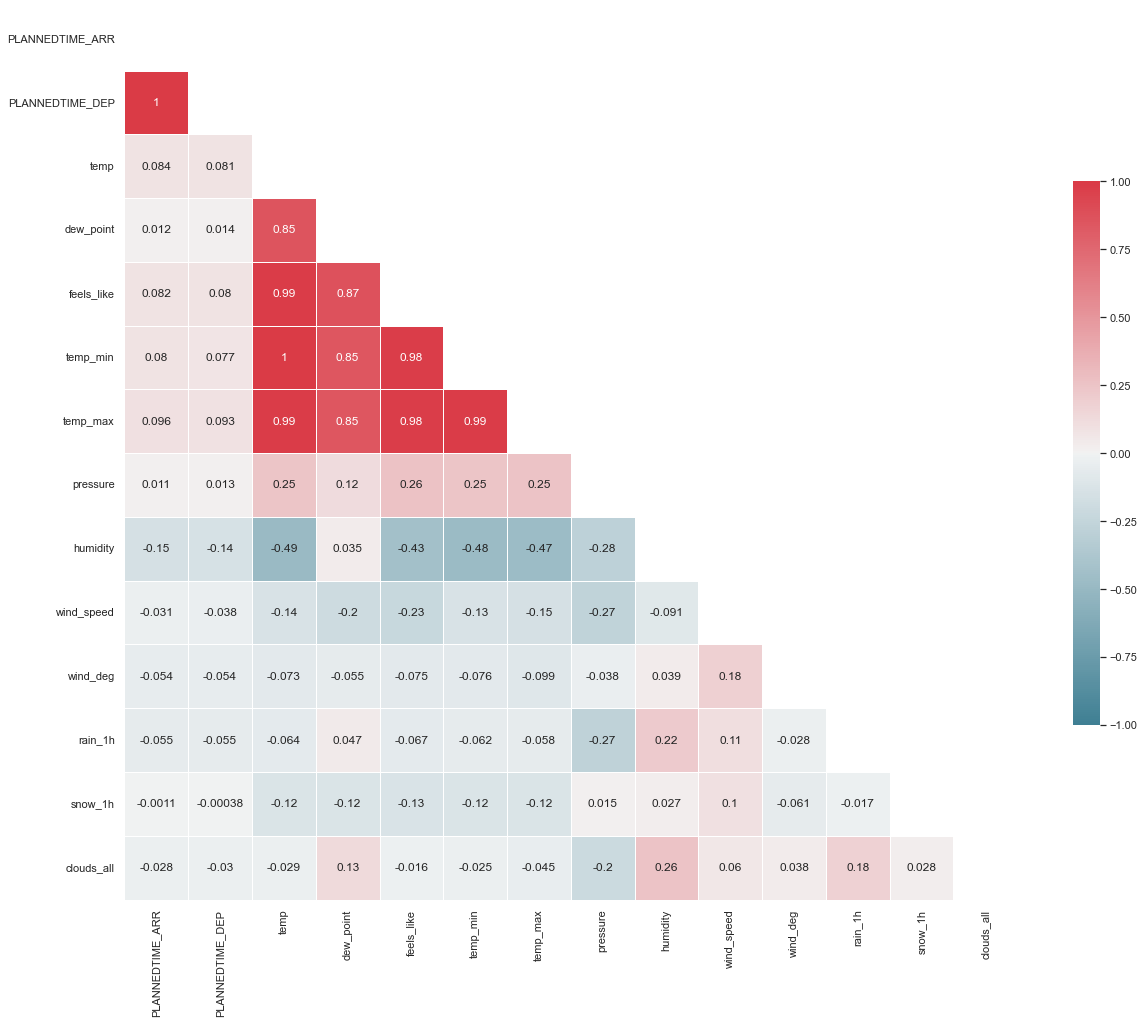

In [83]:
df_temp = df_dir_2[df_dir_2['LINEID'] == '46A']
df_temp.set_index(np.random.permutation(df_temp.index))
df_temp.sort_index(inplace=True)
df_temp.drop(columns=['LINEID'], inplace=True)

X = df_temp.drop(columns=["TRIPTIME"], axis=1)
y = pd.DataFrame(df_temp['TRIPTIME'])

    # do test train split
    # Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=1)
    # Select columns containing categorical data
categorical_cols = X_train.select_dtypes('object').columns
categorical_cols = categorical_cols.append(
X_train[['WEEKDAY', 'HOUR', 'MONTH', 'RUSHHOUR', 'weather_id', 'weather_main', 'weather_description', 'snow_ice', 'heavy_precip']].columns)

    # Convert data type to category for these columns
for col in categorical_cols:
        X_train[col] = X_train[col].astype('category')
continuous_cols = X_train.select_dtypes(['float64', 'int64']).columns

# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Calculate correlation of all pairs of continuous features
corr = X_train[continuous_cols].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=90)

Although their are variations for the correlation of each feature as we were looking at a number of lines, I have grouped them into the following brackets based upon the best correlation value shown.

<b>Correlations</b>

| Low correlation | Medium correlation | High correlation |
|-----------------|--------------------|------------------|
| x <= 0.1       | 0.1 < x < 0.3    | x >= 0.3       |
| temp_min, temp, temp_max, feels_like, rain_1h, wind_deg, clouds_all, snow_1h, dew_point, pressure | humidity, wind_speed | plannedtime_dep, plannedtime_arr|

Some of the most informative features are shown as 'wind_speed' and 'humidity'. There are no strong correlations shown between these features and any other features so I will keep both. There is also a strong correlation between features 'plannedtime_arr' and 'plannedtime_dep'. As 'plannedtime_dep' consistently shows a higher correlation with the target feature, I will drop 'plannedtime_arr'.

I will drop the other features from the dataframe as they are unlikely to contribute to the model.

In [84]:
features_to_drop = ['PLANNEDTIME_ARR', 'feels_like', 'rain_1h', 'wind_deg',
                    'clouds_all', 'snow_1h', 'dew_point', 'pressure', 'temp_min', 'temp_max', 'temp']
high_correlations_features = ['wind_speed', 'humidity', 'PLANNEDTIME_DEP']


In [85]:
df_dir_2 = df_dir_2.drop(columns=features_to_drop, axis=1)
df_dir_2


,LINEID,PLANNEDTIME_DEP,HOUR,humidity,wind_speed,weather_id,weather_main,weather_description,snow_ice,heavy_precip,TRIPTIME,WEEKDAY,MONTH,RUSHHOUR
0,1,82800.0,23,87,7.2,300,Drizzle,light intensity drizzle,0,0,2953.0,2,2,0
1,150,84000.0,23,87,7.2,300,Drizzle,light intensity drizzle,0,0,1778.0,2,2,0
2,145,84000.0,23,87,7.2,300,Drizzle,light intensity drizzle,0,0,2604.0,2,2,0
3,9,84000.0,23,87,7.2,300,Drizzle,light intensity drizzle,0,0,1629.0,2,2,0
4,54A,84600.0,23,87,7.2,300,Drizzle,light intensity drizzle,0,0,2137.0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933562,65,87600.0,0,71,7.2,802,Clouds,scattered clouds,0,0,2900.0,6,5,0
933563,68,87000.0,0,71,7.2,802,Clouds,scattered clouds,0,0,1535.0,6,5,0
933564,65,87300.0,0,93,2.1,803,Clouds,broken clouds,0,0,3505.0,1,5,0
933565,68,87300.0,0,93,2.1,803,Clouds,broken clouds,0,0,1328.0,1,5,0


Create stacked bar plots for all categorical features

Plotting categorical pairwise interactions for only the line with the highest number of rows (46A)

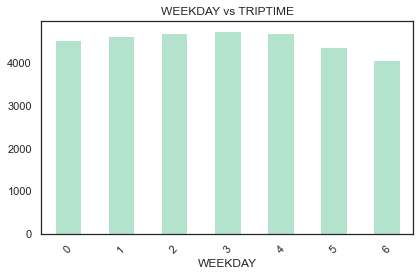

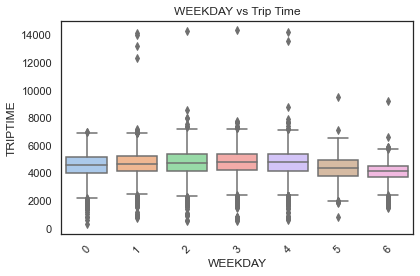

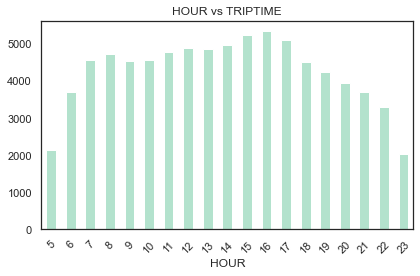

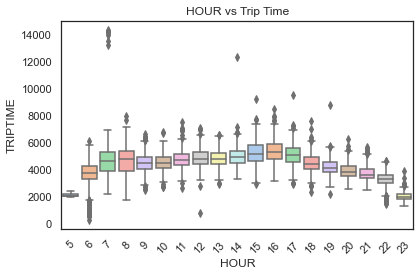

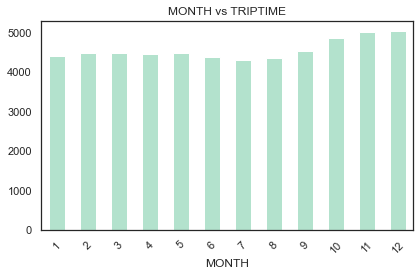

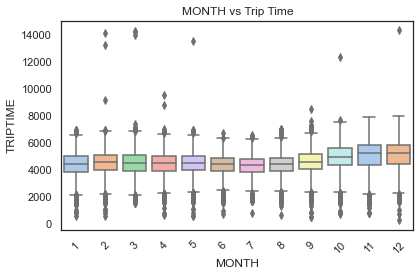

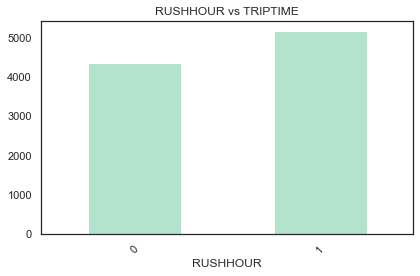

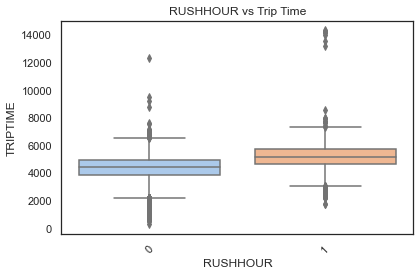

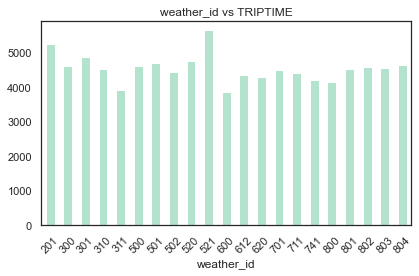

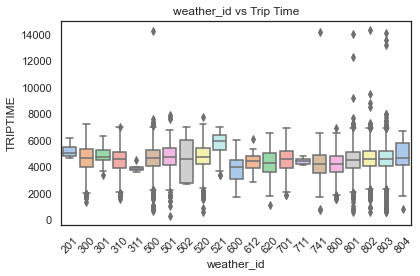

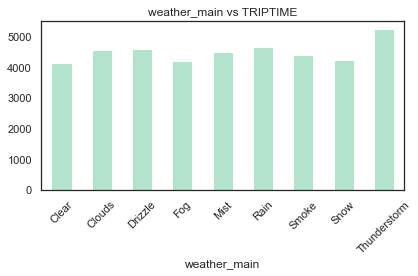

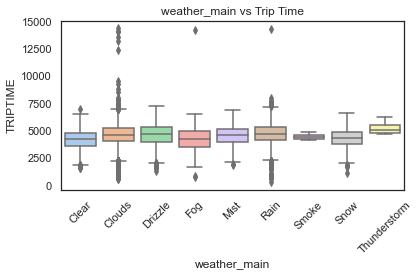

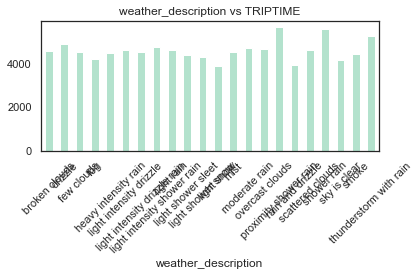

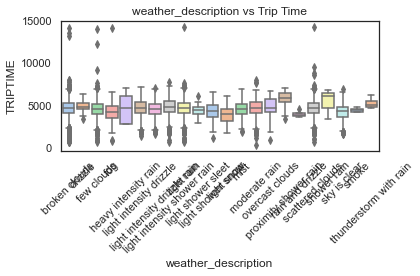

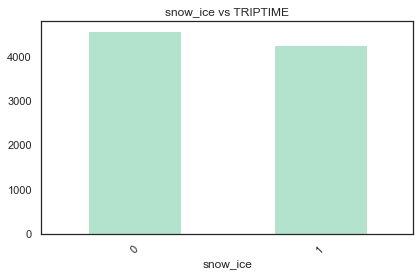

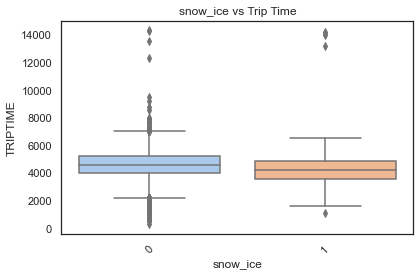

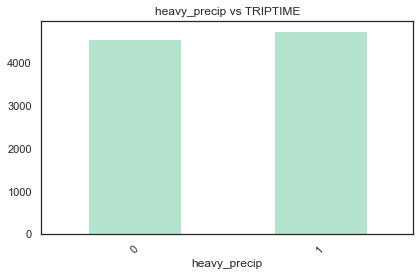

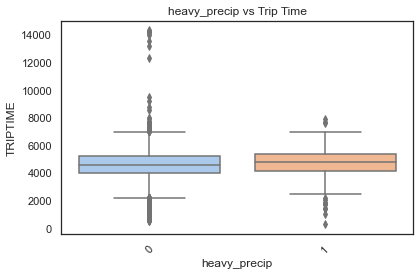

In [86]:
df_temp = df_dir_2[df_dir_2['LINEID'] == '46A']
df_temp.set_index(np.random.permutation(df_temp.index))
df_temp.sort_index(inplace=True)
df_temp.drop(columns=['LINEID'], inplace=True)

X = df_temp.drop(columns=["TRIPTIME"], axis=1)
y = pd.DataFrame(df_temp['TRIPTIME'])

# do test train split
# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)
# Select columns containing categorical data
categorical_cols = X_train[['WEEKDAY', 'HOUR', 'MONTH', 'RUSHHOUR', 'weather_id',
                            'weather_main', 'weather_description', 'snow_ice', 'heavy_precip']].columns

# Convert data type to category for these columns
for col in categorical_cols:
    X_train[col] = X_train[col].astype('category')
continuous_cols = X_train.select_dtypes(['float64', 'int64']).columns

for col in categorical_cols:
    bar_plot(col, 'TRIPTIME', df_temp)
    plt.show()
    boxplot_time(col, X_train, y_train)
    plt.show()


| Feature             | Interaction with Triptime                                                                                           | Action |
|---------------------|---------------------------------------------------------------------------------------------------------------------|--------|
| Weekday             | Monday and weekend values showing lower means                                                                       | Keep   |
| Hour                | 6pm to 5am showing low mean values, rush hours evident                                                              | Keep   |
| Month               | Winter months showing longer triptimes                                                                              | Keep   |
| Rush hour           | Non-rush hour values showing lower mean trip time                                                                   | Keep   |
| Weather ID          | Lots of variation across categories                                                                                 | Keep   |
| Weather Main        | Less variation across categories when compared to weather ID and description features, however, more than in direction 1 results                                      | Drop   |
| Weather Description | Lots of variation across categories, however, will be dropped due to it holding the same information was weather ID | Drop   |
| Snow Ice            | Low information gain                                                                                                | Drop   |
| Heavy Precip        | Low information gain                                                                                                | Drop   |

In [87]:
categorical_low_info_gain = ['snow_ice', 'heavy_precip','weather_main', 'weather_description']
categorical_med_info_gain = ['weather_id']
categorical_high_info_gain = ['HOUR', 'WEEKDAY', 'MONTH', 'RUSHHOUR']


In [88]:
df_dir_2 = df_dir_2.drop(columns=categorical_low_info_gain, axis=1)


In [89]:
df_dir_2.to_csv(
    '/Users/rebeccadillon/git/dublin-bus-team-5/machinelearning/data/cleaned/feature_pairwise_cleaned_dir2.csv', index=False)


Move to s5_rfr_lr_modelling.ipynb